## Importing The Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
import joblib

### READING THE DATA

In [2]:
training_data = pd.read_excel('TrainingData.xlsx')
testing_data = pd.read_excel('TestingData.xlsx')

In [3]:
training_data.shape

(90347, 200)

In [4]:
testing_data.shape

(35202, 200)

In [5]:
training_data.sample(2)

,Year,Quarter,Country,Local Material Description,Product ID,Local Brand Name,Local Sub-Brand Name,Product Type,Global Brand Name,Standard Brand Name,...,Flouride,Glycerol,Inulin,L-Arginine,L-Carnitine,Monosaccharides,Neotame,Nitrogen,Phenylalanine + Tyrosine,Polydextrose
84247,2020,Q4,Mexico,MINI BRAND238 REP 39GRX48X1,23623932,BRAND238,MINI BRAND238,FOOD,BRAND589,BRAND238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6582,2020,Q1,Russian Federation,100%GOLD NEC TOM PULP 1.93L SL6X BF,5920489,BRAND115,BRAND115 CLASSIC,BEVERAGE,BRAND591,BRAND115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### CONCATENATING THE TRAINING AND TESTING DATA SO DATA MANIPULATION CAN BE MUCH MORE EASIER

In [6]:
df = pd.concat([training_data, testing_data], axis=0)
df.sample(3)

,Year,Quarter,Country,Local Material Description,Product ID,Local Brand Name,Local Sub-Brand Name,Product Type,Global Brand Name,Standard Brand Name,...,Flouride,Glycerol,Inulin,L-Arginine,L-Carnitine,Monosaccharides,Neotame,Nitrogen,Phenylalanine + Tyrosine,Polydextrose
61658,2020,Q3,Mexico,BRAND293 TOST SAZ XDX 100GRX56X1,25443018,BRAND293,BRAND293 TOSTADO SAZONADO,FOOD,BRAND589,BRAND293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16983,2021,Q1,Canada,Qua Yogrt 30cnt Cbpk Ret,639097,BRAND419,BRAND419,FOOD,BRAND589,BRAND722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64553,2020,Q3,United States,GA G2 12OZ 4/6PK FRT PUN,982371,BRAND357,NaN,BEVERAGE,BRAND11,BRAND593,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0


### PERFORMING THE EXPLORATION DATA ANALYSIS (EDA)

In [7]:
df.shape

(125549, 200)

In [8]:
df.isnull().sum()[:20]

Year                              0
Quarter                           0
Country                           0
Local Material Description       10
Product ID                        0
Local Brand Name               1589
Local Sub-Brand Name          34083
Product Type                      0
Global Brand Name                 0
Standard Brand Name               0
Standard Sub-Brand Name           0
Category Name                 36198
Sub-Category Name             40907
Segment Name                  41873
Sub-Segment Name              48562
Volume Units                  16316
Flavor                        13794
Standard Flavor Name          56472
Kilojoules                    56526
Total Calories                13796
dtype: int64

In [9]:
df.describe()

,Year,Product ID,Kilojoules,Total Calories,Total Fat,Calories from Fat,Calories From Saturated Fat,Calories - Canada,Saturated Fat,Saturated Fat per 100 kcals,...,Flouride,Glycerol,Inulin,L-Arginine,L-Carnitine,Monosaccharides,Neotame,Nitrogen,Phenylalanine + Tyrosine,Polydextrose
count,125549.000000,1.255490e+05,69023.000000,111753.000000,110115.000000,14912.000000,4894.000000,9698.000000,111722.000000,111671.000000,...,2857.000000,7790.000000,7790.000000,0.0,0.0,4317.000000,2712.0,3626.000000,9516.000000,7790.0
mean,2020.418888,1.773340e+07,850.268002,414.013094,21.482599,151.489010,64.127832,245.511851,5.398496,1.157886,...,0.000158,0.000670,0.004291,NaN,NaN,0.118410,0.0,0.000742,0.019457,0.0
std,0.721410,9.605795e+06,971.326889,183.593030,13.658256,127.544915,35.342008,209.108309,5.202982,1.138221,...,0.002168,0.024137,0.091771,NaN,NaN,0.362768,0.0,0.016823,0.119736,0.0
min,2020.000000,3.709360e+05,0.000000,0.000000,0.000000,0.000000,5.670000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0
25%,2020.000000,1.111811e+07,0.000000,385.106000,7.400000,0.676000,37.890000,23.376000,1.620000,0.420000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0
50%,2020.000000,2.323305e+07,201.000000,497.000000,25.500000,194.520000,45.404000,331.231000,3.780000,0.810000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0
75%,2021.000000,2.491303e+07,2053.405000,531.571000,32.400000,263.080000,95.607000,442.508500,8.500000,2.000000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0
max,2022.000000,2.767305e+07,3076.000000,748.000000,82.500000,470.580000,136.212000,624.046000,61.019000,79.290000,...,0.030000,0.870000,2.022000,NaN,NaN,1.906000,0.0,0.460000,1.656000,0.0


In [10]:
# Getting Rid Of columns with over 60% of null values
df = df.loc[:, df.isnull().mean() < .6]
df.isnull().sum()[:10]

Year                              0
Quarter                           0
Country                           0
Local Material Description       10
Product ID                        0
Local Brand Name               1589
Local Sub-Brand Name          34083
Product Type                      0
Global Brand Name                 0
Standard Brand Name               0
dtype: int64

In [11]:
df.shape

(125549, 48)

In [12]:
df.columns

Index(['Year', 'Quarter', 'Country', 'Local Material Description',
       'Product ID', 'Local Brand Name', 'Local Sub-Brand Name',
       'Product Type', 'Global Brand Name', 'Standard Brand Name',
       'Standard Sub-Brand Name', 'Category Name', 'Sub-Category Name',
       'Segment Name', 'Sub-Segment Name', 'Volume Units', 'Flavor',
       'Standard Flavor Name', 'Kilojoules', 'Total Calories', 'Total Fat',
       'Saturated Fat', 'Saturated Fat per 100 kcals', 'Trans Fatty Acids',
       'Cholesterol', 'Carbohydrate Total', 'Sugars', 'Added Sugars',
       'Calories from Added Sugars per 355ml', '% of Energy from Added Sugars',
       'Sodium', 'Sodium per kcal', 'Protein', 'Dietary Fiber', 'Whole Grains',
       'Fruits - Solids', 'Fruits - Liquids', 'Vegetables - Solids',
       'Vegetables - Liquids', 'Total Dairy Products', 'Nuts & Seeds',
       'Calcium', 'Iron', 'Magnesium', 'Potassium', 'Vitamin A', 'Vitamin C',
       'Vitamin D'],
      dtype='object')

In [13]:
df['Year'].unique()

array([2020, 2021, 2022], dtype=int64)

## DATA VISUALIZATION

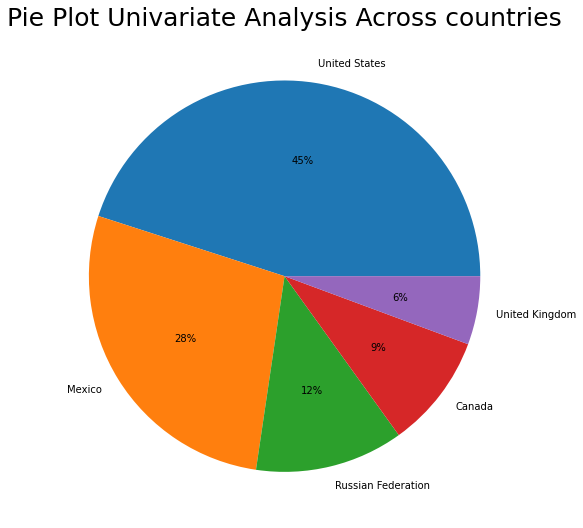

In [14]:
country_pie = df.groupby('Country')['Country'].count().sort_values(ascending=False)[:5]

plt.figure(figsize=(9,9))
plt.pie(country_pie, labels=country_pie.index, autopct="%.0f%%")
plt.title('Pie Plot Univariate Analysis Across countries', fontsize=25)
plt.show()

## The graph above shows the analysis of products across different Countries with US having the highest and UK having the lowest  

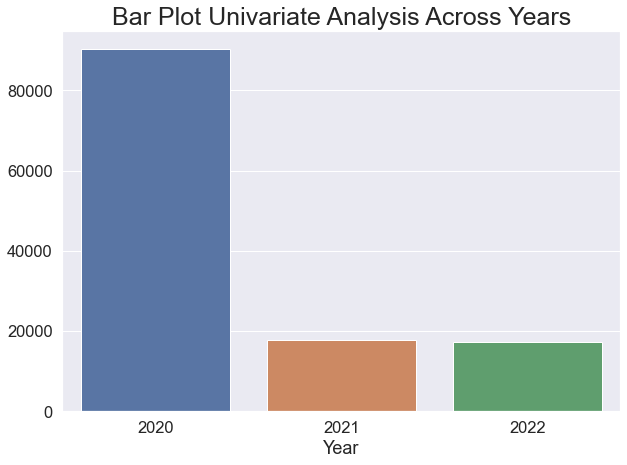

In [15]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,7))
sns.barplot(x=df.groupby('Year').Year.count().index,y=df.groupby('Year').Year.count().values)
plt.title('Bar Plot Univariate Analysis Across Years', fontsize=25)
plt.show()

## The Above bar plot reveals that the year 2020 has the highest volume of sales.

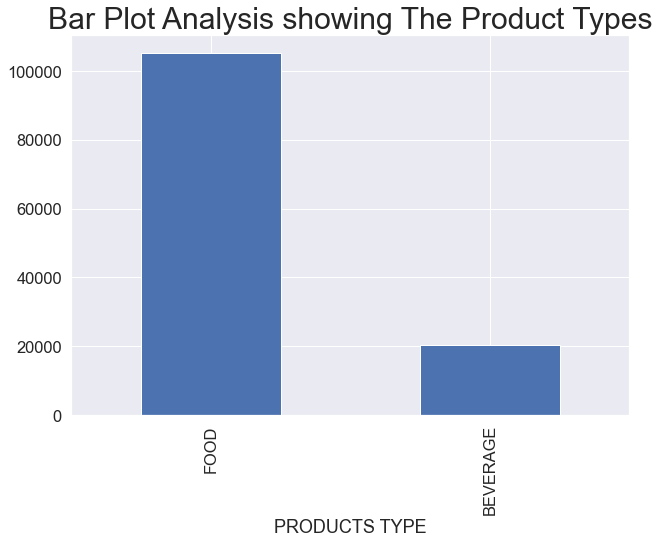

In [16]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,7))
df['Product Type'].value_counts().plot(kind='bar')
plt.xlabel('PRODUCTS TYPE')
plt.title("Bar Plot Analysis showing The Product Types", fontsize=30)
plt.show()

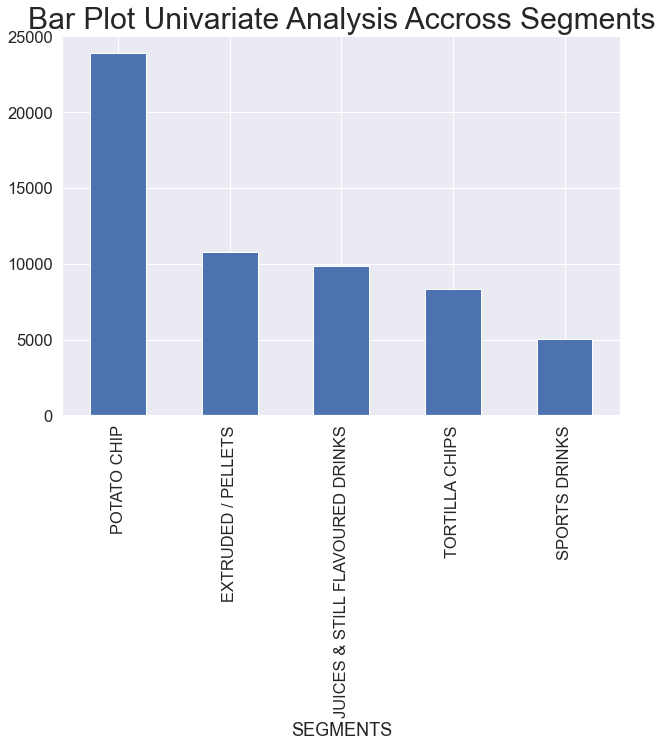

In [17]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,7))
df['Segment Name'].value_counts()[:5].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('SEGMENTS')
plt.title("Bar Plot Univariate Analysis Accross Segments", fontsize=30)
plt.show()

# SUMMARY

1. US HAS THE HIGHEST DISTRIBUTION OF PRODUCTS ACROSS DIFFERENT WHILE UK HAS THE LOWEST
2. HIGH VOLUME OF SALES OF POTATO CHIP ACROSS SEGMENTS
3. 2020 HAS THE HIGHEST VOLUME OF SALES
4. THE FOOD PRODUCT HAS THE HIGHEST SALES IN THE PRODUCT TYPE COLUMN

In [18]:
# dropping unnecessary columns
df.drop(['Product ID', 'Quarter'], axis=1, inplace=True)

In [19]:
df.columns

Index(['Year', 'Country', 'Local Material Description', 'Local Brand Name',
       'Local Sub-Brand Name', 'Product Type', 'Global Brand Name',
       'Standard Brand Name', 'Standard Sub-Brand Name', 'Category Name',
       'Sub-Category Name', 'Segment Name', 'Sub-Segment Name', 'Volume Units',
       'Flavor', 'Standard Flavor Name', 'Kilojoules', 'Total Calories',
       'Total Fat', 'Saturated Fat', 'Saturated Fat per 100 kcals',
       'Trans Fatty Acids', 'Cholesterol', 'Carbohydrate Total', 'Sugars',
       'Added Sugars', 'Calories from Added Sugars per 355ml',
       '% of Energy from Added Sugars', 'Sodium', 'Sodium per kcal', 'Protein',
       'Dietary Fiber', 'Whole Grains', 'Fruits - Solids', 'Fruits - Liquids',
       'Vegetables - Solids', 'Vegetables - Liquids', 'Total Dairy Products',
       'Nuts & Seeds', 'Calcium', 'Iron', 'Magnesium', 'Potassium',
       'Vitamin A', 'Vitamin C', 'Vitamin D'],
      dtype='object')

In [20]:
# Dum of duplicated values
df.duplicated().sum()

#Drop duplicate values
df.drop_duplicates(inplace=True)

# DATA PREPROCESSING 

## Drop The Unnecessary Columns

In [21]:
cols_to_be_dropped = ['Local Material Description','Local Brand Name','Local Sub-Brand Name','Global Brand Name',
                     'Standard Sub-Brand Name', 'Sub-Category Name','Sub-Segment Name','Volume Units','Standard Flavor Name',
                     'Kilojoules','Saturated Fat per 100 kcals','% of Energy from Added Sugars','Sodium per kcal','Whole Grains',
                     'Standard Brand Name', 'Flavor','Segment Name','Vitamin A', 'Vitamin C', 'Vitamin D']

df.drop(cols_to_be_dropped, axis=1, inplace=True)
df.columns

Index(['Year', 'Country', 'Product Type', 'Category Name', 'Total Calories',
       'Total Fat', 'Saturated Fat', 'Trans Fatty Acids', 'Cholesterol',
       'Carbohydrate Total', 'Sugars', 'Added Sugars',
       'Calories from Added Sugars per 355ml', 'Sodium', 'Protein',
       'Dietary Fiber', 'Fruits - Solids', 'Fruits - Liquids',
       'Vegetables - Solids', 'Vegetables - Liquids', 'Total Dairy Products',
       'Nuts & Seeds', 'Calcium', 'Iron', 'Magnesium', 'Potassium'],
      dtype='object')

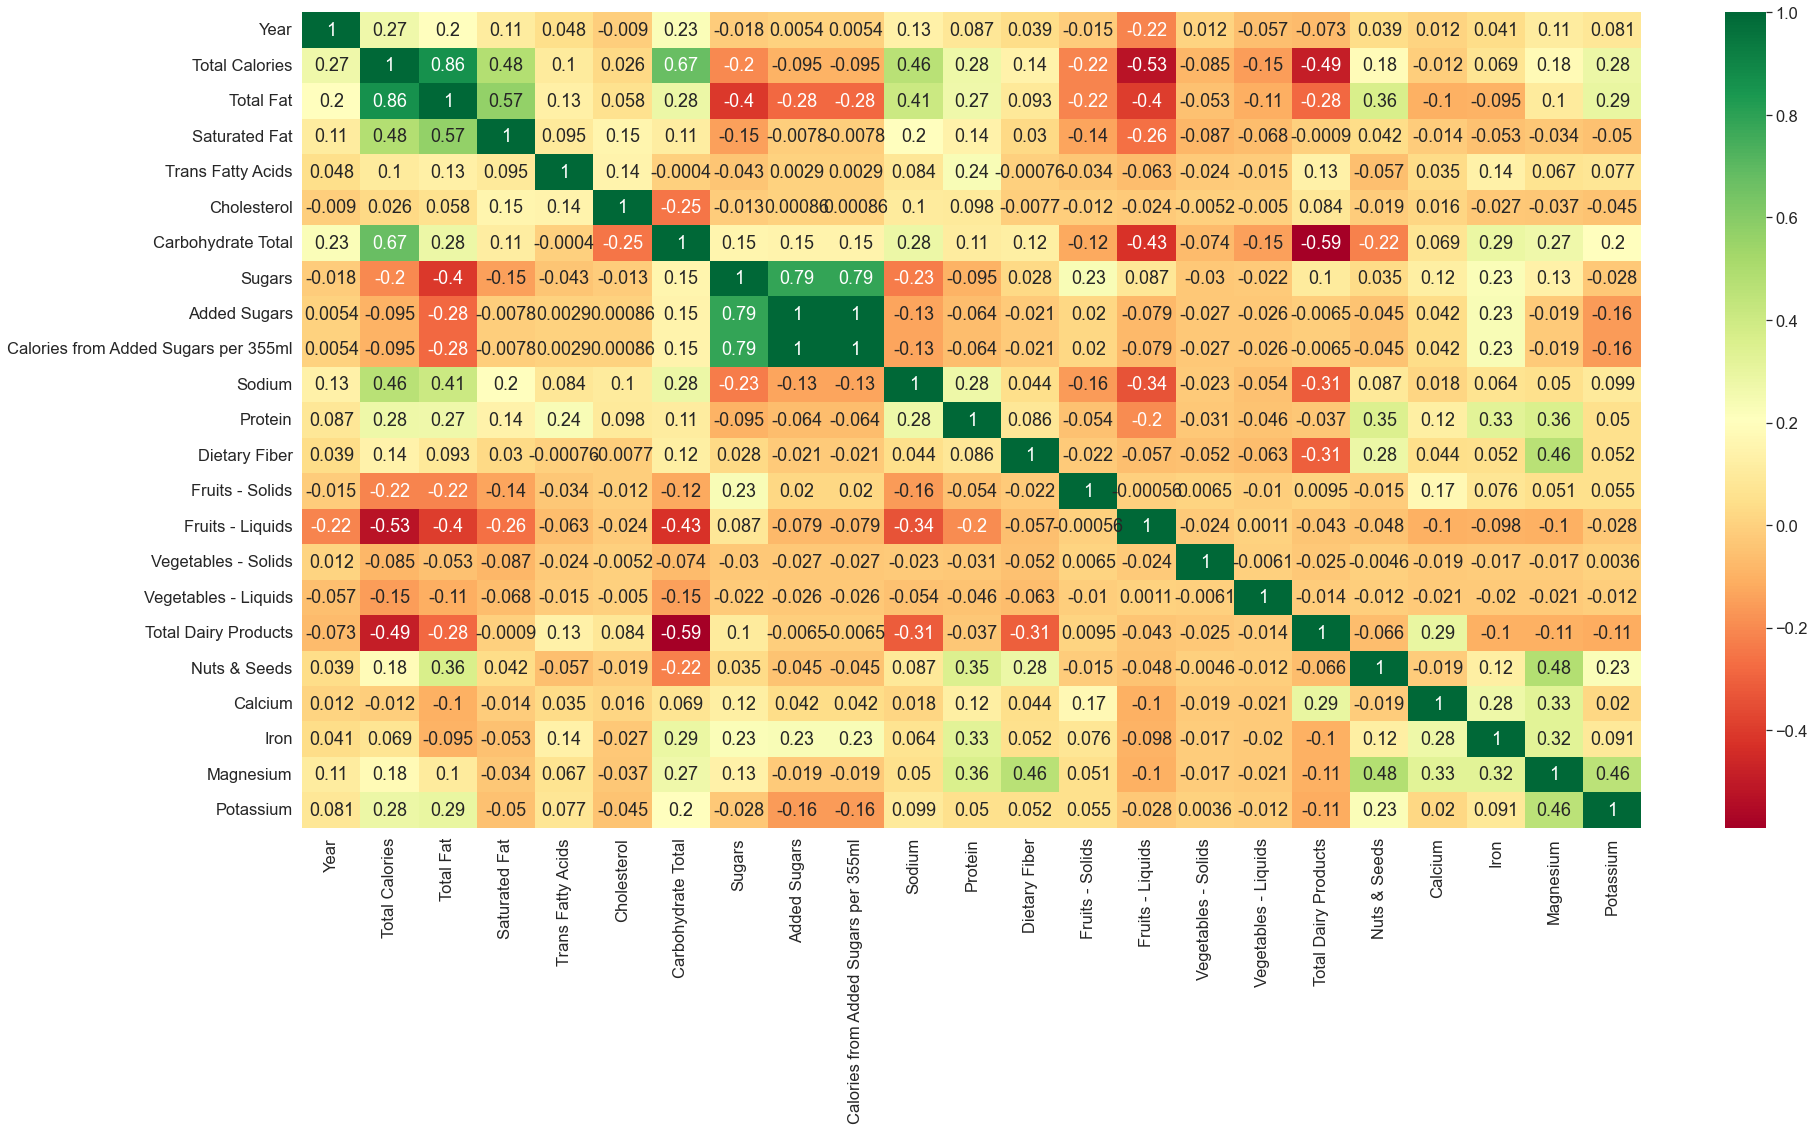

In [22]:
df_corr = df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(df_corr, annot=True, cmap='RdYlGn');

In [23]:
# filling the Null values in the Category column
cat_mode = df['Category Name'].mode()[0]
df['Category Name'].fillna(cat_mode, inplace=True)

# value counts
df['Category Name'].value_counts()

SAVOURY SNACKS        54313
BEVERAGES              5132
FOODS                  1773
DAIRY                  1641
GRAINS                 1640
COOKIES & CRACKERS      899
CONFECTIONARY           460
NUTRITION               192
DAIRY FOODS              11
DAIRY BEVERAGES           3
Name: Category Name, dtype: int64

## One Hot Encoding the columns with many categorical variables

In [24]:
df = pd.get_dummies(df, columns=['Category Name','Country', 'Product Type'], drop_first=True)

In [25]:
df.head()

,Year,Total Calories,Total Fat,Saturated Fat,Trans Fatty Acids,Cholesterol,Carbohydrate Total,Sugars,Added Sugars,Calories from Added Sugars per 355ml,...,Country_Saudi Arabia,Country_South Africa,Country_Spain,Country_Thailand,Country_Turkey,Country_Ukraine,Country_United Kingdom,Country_United States,Country_Vietnam,Product Type_FOOD
0,2020,488.0,28.0,13.0,0.0,NaN,51.0,1.8,1.8,25.56,...,0,0,0,0,0,0,0,0,0,1
1,2020,499.0,26.0,12.0,0.0,NaN,59.0,2.9,2.9,41.18,...,0,0,0,0,0,0,0,0,0,1
2,2020,491.0,25.0,12.0,0.0,NaN,58.0,4.4,4.4,62.48,...,0,0,0,0,0,0,0,0,0,1
3,2020,488.0,28.0,13.0,NaN,NaN,52.0,1.7,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,2020,496.0,29.0,13.0,NaN,NaN,52.0,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


## Filtering out the columns with float dtypes, and then fill the null values with the mean of each column respectively

In [26]:
cols_with_flt_dtypes = df.select_dtypes(include=['float']).columns.tolist()

for col in cols_with_flt_dtypes:
    col_mean = df[col].mean()
    df[col].fillna(col_mean, inplace=True)
    
print(df[cols_with_flt_dtypes].isna().sum())

Total Calories                          0
Total Fat                               0
Saturated Fat                           0
Trans Fatty Acids                       0
Cholesterol                             0
Carbohydrate Total                      0
Sugars                                  0
Added Sugars                            0
Calories from Added Sugars per 355ml    0
Sodium                                  0
Protein                                 0
Dietary Fiber                           0
Fruits - Solids                         0
Fruits - Liquids                        0
Vegetables - Solids                     0
Vegetables - Liquids                    0
Total Dairy Products                    0
Nuts & Seeds                            0
Calcium                                 0
Iron                                    0
Magnesium                               0
Potassium                               0
dtype: int64


## KFold Cross Validation

In [27]:
# Data Segmentation

y = df['Added Sugars']
X = df.drop('Added Sugars', axis=1)

In [28]:
def fit_predict(model, X, y, K, normalize=False):
    
    kfold = KFold(n_splits=K, shuffle=True, random_state=2)
    scores = 0
    scaler = StandardScaler()
    
    for i, (train_index, test_index) in enumerate(kfold.split(X,y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]        
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
               
        # Normalize data                                      
        if normalize:
            
            train_avg = X_train.mean(); train_std = X_train.std()
            test_avg = X_test.mean(); test_std = X_test.std()
            
            # normalize train dataset
            X_train = (X_train-train_avg) / test_std
            # normalize test dataset with mean and std of train dataset
            X_test = (X_test-test_avg) / test_std
        
        # Fit the data
        model.fit(X_train, y_train)  
        # predict
        pred = model.predict(X_test)
                                                  
        # rmse
        rmse = mean_squared_error(y_test, pred, squared=False)
        # r2 score
        acc = r2_score(y_test, pred)
        # take mean of rmse scores
        scores += rmse/K

        if i % 4 == 0:
            print(f'Fold {i+1} RMSE: {rmse}')
            print('='*45)

    print()
    print(f'Avg RMSE: {scores} ')
    print(f'{model} Model R2_Score : {acc}')
    

    return scores, model                                 

In [29]:
result = {}

In [30]:
regressor = RandomForestRegressor(n_estimators=200, max_depth=5, n_jobs=2, random_state=42)
reg_rmse, reg_ = fit_predict(regressor, X, y, 25)

result['random Forest RMSE'] = reg_rmse

Fold 1 RMSE: 0.3471529086900902
Fold 5 RMSE: 0.3768332416239857
Fold 9 RMSE: 0.32157928285780046
Fold 13 RMSE: 0.33176010930165806
Fold 17 RMSE: 0.36003641427831984
Fold 21 RMSE: 0.381537114106319
Fold 25 RMSE: 0.33081991495884044

Avg RMSE: 0.609259502597591 
RandomForestRegressor(max_depth=5, n_estimators=200, n_jobs=2, random_state=42) Model R2_Score : 0.9989045706374126


In [31]:
xgb = XGBRegressor(n_estimators=200, n_jobs=2, random_state=42)
xgb_rmse, xgb_ = fit_predict(xgb, X, y, 25)

result['XGB RMSE'] = xgb_rmse

Fold 1 RMSE: 0.008610966036825377
Fold 5 RMSE: 0.00787121785185123
Fold 9 RMSE: 0.010252681563336835
Fold 13 RMSE: 0.012272612869343382
Fold 17 RMSE: 0.010525975169562744
Fold 21 RMSE: 0.02398158213576041
Fold 25 RMSE: 0.007655079697415917

Avg RMSE: 0.011217620869954037 
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=42, ...) Model R2_Score : 0.999

In [38]:
result

{'random Forest RMSE': 0.609259502597591, 'XGB RMSE': 0.011217620869954037}

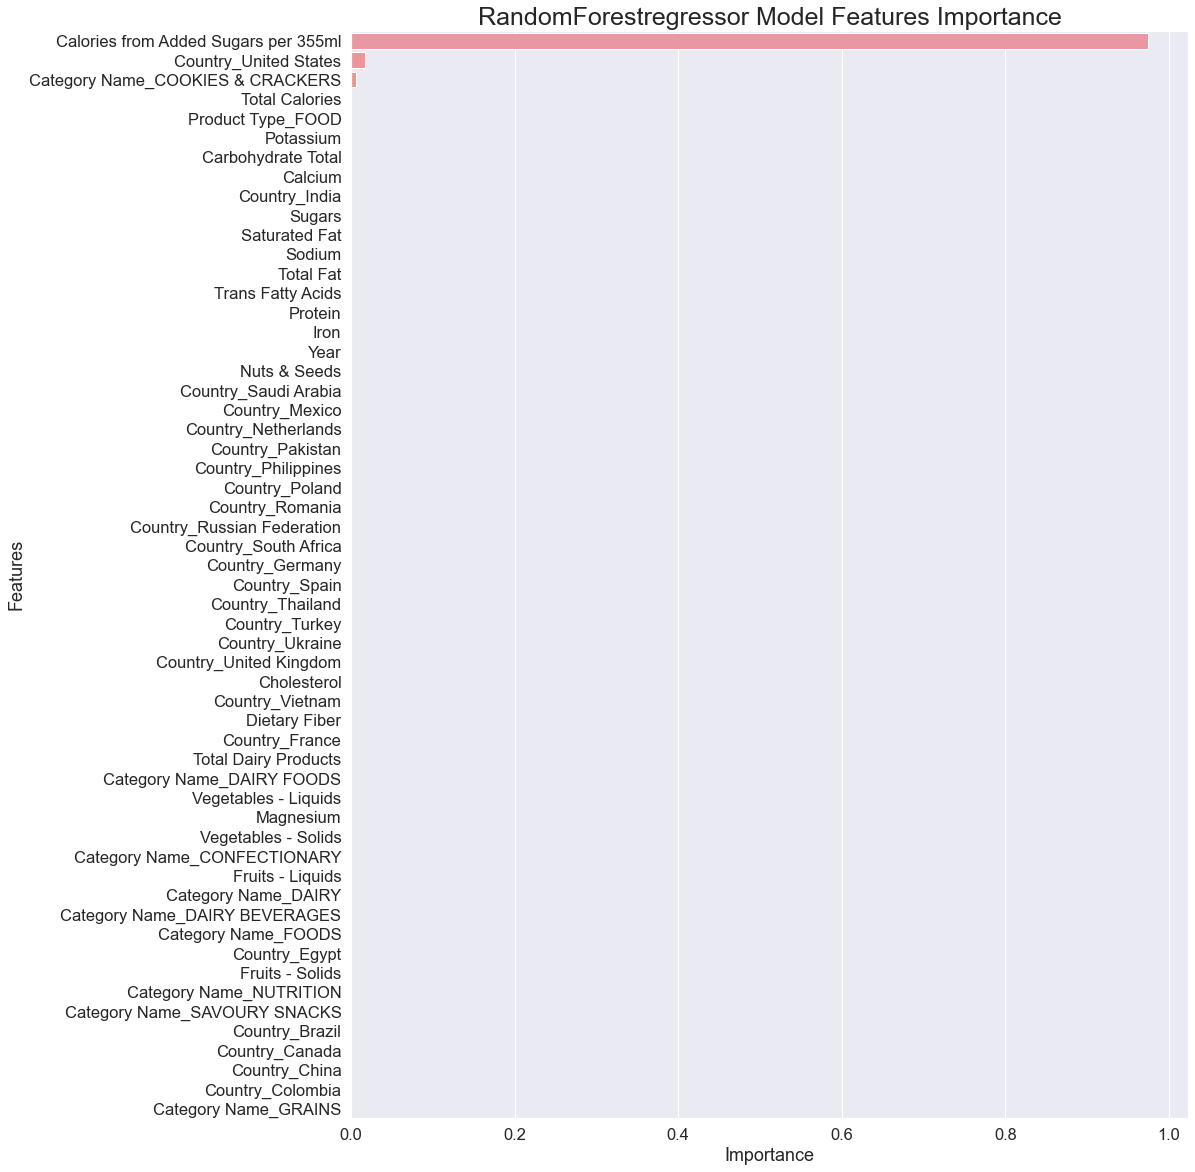

In [39]:
def plot_features_importance(importance, names, model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data = {'importance' : feature_importance, 'feature names':feature_names}
    
    # convert array into Dataframe
    imp_df = pd.DataFrame(data)
    
    # sort values in descending order for plotting features importance
    imp_df.sort_values(by=['importance'], ascending=False, inplace=True)
    
    # Plot size
    plt.figure(figsize=(15,20))
    # bar plot
    sns.barplot(x=imp_df['importance'], y=imp_df['feature names'])
    
    plt.title(f'{model_type} Model Features Importance', fontsize=25)
    plt.xlabel('Importance')
    plt.ylabel('Features')
    

plot_features_importance(regressor.feature_importances_, X.columns, 'RandomForestregressor')

## Dump The XGBRegressor Model into a Pickle file

In [40]:
joblib.dump(xgb, 'XGBFinalModel.pkl')

['XGBFinalModel.pkl']